In [6]:
import pandas as pd 
DF = pd.read_csv('xbox_final_merged_data.csv')
print(DF)

        product_id                                title  \
0     9P76MMJG50DS                Bratz® Rhythm & Style   
1     9P8XKV2D5DZ5                          Dome Keeper   
2     9PCJT6TLCGGV                              ROUTINE   
3     9N3F1LW9HC6C           Lost Records: Bloom & Rage   
4     9N79TQTZTQQ4               MARVEL Cosmic Invasion   
...            ...                                  ...   
1809  BQ0WGG6B6X2H  Sid Meier's Civilization Revolution   
1810  BXTCRVBZ52DN       Might & Magic Clash of Heroes™   
1811  BW4BKDN4WT8F        Tom Clancy's RainbowSix Vegas   
1812  BTX1DMQ9G015                 Magic: The Gathering   
1813  C0MKH58NBHRG                          Crackdown 2   

                   publisher                               developer  \
0        Outright Games Ltd.                     RecoTechnology SL.    
1                   Raw Fury                              Bippinbits   
2                   Raw Fury                          Lunar Software   
3  

In [10]:
DF.drop_duplicates(subset= ['product_id'])
columns_drop = ['Owner Notes','ESRB','ESRB Content Descriptors','Community Notes','Status.1','Added.1', 'Delay']
DF.drop(columns = columns_drop)
DF.columns
pd.to_numeric(DF["rating_alltime_count", "rating_7_days_count", "rating_30_days_count", "rating_7_days_avg", "rating_30_days_avg", "rating_alltime_avg"], errors='coerce').fillna(0)
    

KeyError: ('rating_alltime_count', 'rating_7_days_count', 'rating_30_days_count', 'rating_7_days_avg', 'rating_30_days_avg', 'rating_alltime_avg')

In [8]:
publisher_map = {
    # 2K / Take-Two
    '2k': '2k',
    '2k games': '2k',
    '2k publishing': '2k',
    'visual concepts': '2k',
    'private division': 'take-two',
    'rockstar games': 'take-two',
    'gearbox software': 'take-two',
    'hangar 13': 'take-two',
    
    # Activision Blizzard
    'activision': 'activision',
    'activision publishing inc.': 'activision',
    'blizzard entertainment': 'blizzard',
    
    # Bandai Namco / D3
    'bandai namco entertainment america': 'bandai namco',
    'bandai namco entertainment': 'bandai namco',
    'bandai namco entertainment america inc.': 'bandai namco',
    'bandai namco entertainment inc.': 'bandai namco',
    'bandai namco studios inc.': 'bandai namco',
    'bandai namco studios': 'bandai namco',
    'namco bandai games america': 'bandai namco',
    'namco bandai games america inc.': 'bandai namco',
    'd3 publisher': 'd3 publisher',
    'd3publisher of america, inc.': 'd3 publisher',
    'd3publisher of america, inc': 'd3 publisher',
    'd3publisher, inc.': 'd3 publisher',
    'd3 publisher of america, inc.': 'd3 publisher',
    'd3 publisher of america inc.': 'd3 publisher',
    
    # Capcom
    'capcom': 'capcom',
    'capcom u.s.a., inc': 'capcom',
    'capcom entertainment, inc.': 'capcom',
    '株式会社 カプコン': 'capcom',
    'capcom co., ltd.': 'capcom',
    'capcom co,. ltd.': 'capcom',
    
    # Daedalic / Nacon
    'daedalic entertainment': 'daedalic',
    'daedalic entertainment gmbh': 'daedalic',
    'big ant studios': 'nacon',
    'big ant studios pty': 'nacon',
    'passtech games': 'nacon',
    
    # Deep Silver / Embracer
    'deep silver': 'deep silver',
    'deep silver dambuster studios': 'deep silver',
    'deep silver, inxile entertainment': 'deep silver',
    'deep silver, koch media': 'deep silver',
    'koch media': 'deep silver',
    'prime matter': 'deep silver',
    'thq nordic': 'thq nordic',
    'thq nordic gmbh': 'thq nordic',
    'nordic games': 'thq nordic',
    'nordic games gmbh': 'thq nordic',
    'coffee stain publishing': 'coffee stain',
    'coffee stain publishing ab': 'coffee stain',
    'milestone s.r.l.': 'milestone',
    'ravenscourt': 'ravenscourt',
    'ravenscourt games': 'ravenscourt',
    
    # Disney
    'disney': 'disney',
    'disney interactive studios': 'disney',
    'disney interactive': 'disney',
    'disney bolt': 'disney',
    'lucasfilm': 'disney',
    'lucasarts': 'disney',
    
    # Electronic Arts
    'electronic arts': 'electronic arts',
    'electronic arts ': 'electronic arts',
    'electronic arts inc.': 'electronic arts',
    'ea': 'electronic arts',
    'ea sports': 'electronic arts',
    'ea sports™': 'electronic arts',
    'ea vancouver': 'electronic arts',
    'ea digital illusions ce ab': 'electronic arts',
    'codemasters': 'electronic arts',
    'codemasters software company limited': 'electronic arts',
    'popcap': 'electronic arts',
    'popcap games': 'electronic arts',
    'popcap games, inc.': 'electronic arts',
    
    # Focus Entertainment
    'focus entertainment': 'focus entertainment',
    'focus home interactive': 'focus entertainment',
    'dotemu': 'focus entertainment',
    'the arcade crew': 'focus entertainment',
    
    # Microsoft / Xbox Game Studios
    'xbox game studios': 'xbox game studios',
    'xbox game studios ': 'xbox game studios',
    'xbox games studios, rare ltd': 'xbox game studios',
    'microsoft': 'xbox game studios',
    'microsoft studios': 'xbox game studios',
    'microsoft game studios': 'xbox game studios',
    'microsoft corporation': 'xbox game studios',
    'xbox live arcade': 'xbox game studios',
    '343 industries': 'xbox game studios',
    'the coalition': 'xbox game studios',
    'turn 10 studios': 'xbox game studios',
    'rare': 'xbox game studios',
    'mojang studios': 'xbox game studios',
    'double fine': 'xbox game studios',
    'double fine productions': 'xbox game studios',
    'double fine productions, inc.': 'xbox game studios',
    
    # SEGA
    'sega': 'sega',
    'sega europe ltd': 'sega',
    'sega of america': 'sega',
    'sega of america, inc.': 'sega',
    'ryu ga gotoku studio': 'sega',
    
    # Square Enix
    'square enix': 'square enix',
    'square enix ltd': 'square enix',
    'square enix co., ltd.': 'square enix',
    'square enix ltdio-interactive a/s': 'square enix',
    'square enix ltdi-interactive a/s': 'square enix',
    
    # Team17
    'team17': 'team17',
    'team17 ': 'team17',
    'team 17': 'team17',
    'team17 digital ltd': 'team17',
    'team17 digital ltd.': 'team17',
    
    # tinyBuild
    'tinybuild': 'tinybuild',
    'tinybuild games': 'tinybuild',
    
    # Others
    'another indie': 'another indie',
    'another indie studio': 'another indie',
    'aspyr': 'aspyr',
    'aspyr media': 'aspyr',
    'astragon entertainment': 'astragon entertainment',
    'astragon entertainment gmbh': 'astragon entertainment',
    'fatshark': 'fatshark',
    'fatshark ab': 'fatshark',
    'fatshark studios ab': 'fatshark',
    'flashbulb': 'flashbulb',
    'flashbulb games': 'flashbulb',
    'headup': 'headup',
    'headup games': 'headup',
    'headup gmbh': 'headup',
    'hypetrain digital': 'hypetrain digital',
    'image & form': 'image & form',
    'image & form games': 'image & form',
    'image & form international ab': 'image & form',
    'jackbox games': 'jackbox games',
    'jackbox games, inc.': 'jackbox games',
    'kalypso media': 'kalypso media',
    'kalypso media group gmbh': 'kalypso media',
    'kalypso media group': 'kalypso media',
    'konami': 'konami',
    'konami digital entertainment': 'konami',
    'konami digital entertainment, inc.': 'konami',
    'playway': 'playway',
    'playway sa': 'playway',
    'playway s.a.': 'playway',
    'pm studios, inc.': 'pm studios',
    'pm-studios, inc.': 'pm studios',
    'spike': 'spike chunsoft',
    'spike chunsoft': 'spike chunsoft',
    'spike chunsoft co., ltd.': 'spike chunsoft',
    'telltale': 'telltale',
    'telltale games': 'telltale',
    'valve': 'valve',
    'versus evil': 'versus evil',
    'versus evil, llc.': 'versus evil',
    'arc system works': 'arc systems',
    'ubisoft entertainment': 'ubisoft',
    'wired productions ltd': 'wired productions',
    'snk playmore corporation':'snk playmore',
    'unknown worlds entertainment': 'unknown worlds',
    'thq nordic': 'thq',
    'tecmo koei america': 'tecmo'
    
}
DF['publisher'] = DF['publisher'].str.strip().str.lower()
DF['publisher'] = DF['publisher'].replace(publisher_map)

In [12]:
def calculate_game_metrics(df):
    """Add calculated metric columns directly to DataFrame."""
    # Get rating counts
    r7 = pd.to_numeric(df["rating_7_days_count"], errors='coerce').fillna(0)
    r30 = pd.to_numeric(df["rating_30_days_count"], errors='coerce').fillna(0)
    r_all = pd.to_numeric(df["rating_alltime_count"], errors='coerce').fillna(0)
    
    # Get ratings
    rating_7d = pd.to_numeric(df["rating_7_days_avg"], errors='coerce').fillna(0)
    rating_30d = pd.to_numeric(df["rating_30_days_avg"], errors='coerce').fillna(0)
    rating_all = pd.to_numeric(df["rating_alltime_avg"], errors='coerce').fillna(0)

    
    # Parse dates
    release_date = pd.to_datetime(df["Release"], errors='coerce')
    gamepass_date = pd.to_datetime(df["Added"], errors='coerce')

    # Normalize timezones: make sure datetimes are tz-naive so subtraction works
    # If series are timezone-aware, convert to naive by removing tz info.
    try:
        if getattr(release_date.dt, 'tz', None) is not None:
            release_date = release_date.dt.tz_convert(None)
    except Exception:
        # fallback: attempt elementwise removal
        release_date = release_date.apply(lambda x: x.tz_convert(None) if getattr(x, 'tzinfo', None) is not None else x)

    try:
        if getattr(gamepass_date.dt, 'tz', None) is not None:
            gamepass_date = gamepass_date.dt.tz_convert(None)
    except Exception:
        gamepass_date = gamepass_date.apply(lambda x: x.tz_convert(None) if getattr(x, 'tzinfo', None) is not None else x)
    
    # Calculate time deltas using a tz-naive 'now'
    now = pd.Timestamp.now()
    df['days_since_release'] = (now - release_date).dt.days
    df['days_since_gp_add'] = (now - gamepass_date).dt.days
    
    # Calculate metrics
    df['momentum'] = ((r7 / r30 * 100).fillna(0)).round(2)
    df['discovery_capture'] = ((r7 / r_all * 100).fillna(0)).round(2)
    df['quality_retention'] = (rating_30d - rating_all).round(3)
    df['rating_trend_7d_vs_alltime'] = (rating_7d - rating_all).round(3)
    df['is_day_one_gp'] = (df['days_since_gp_add'] <= 1) & (gamepass_date.notna())
    
    return df
calculate_game_metrics(DF)

/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_18203/1174949087.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  release_date = pd.to_datetime(df["Release"], errors='coerce')
/var/folders/bh/dh1w_fld0j96ldg4hvhzhdw00000gn/T/ipykernel_18203/1174949087.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gamepass_date = pd.to_datetime(df["Added"], errors='coerce')


,product_id,title,publisher,developer,short_description,category,original_release_date,gamepass_added_date,rating_7_days_count,rating_30_days_count,...,Status.1,Added.1,Delay,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp
0,9P76MMJG50DS,Bratz® Rhythm & Style,outright games ltd.,RecoTechnology SL.,Rule the runway and take the stage with the Br...,Unknown,2025-09-12 04:00:00+00:00,NaN,112,461,...,NaN,NaN,NaN,NaN,NaN,24.30,23.63,0.0,0.0,False
1,9P8XKV2D5DZ5,Dome Keeper,raw fury,Bippinbits,Defend against waves of alien monsters in this...,Unknown,2025-12-09 14:00:00+00:00,NaN,85,504,...,NaN,NaN,NaN,NaN,NaN,16.87,16.87,0.0,0.1,False
2,9PCJT6TLCGGV,ROUTINE,raw fury,Lunar Software,ROUTINE is a First Person Sci-Fi Horror set on...,Unknown,2025-12-04 15:00:00+00:00,NaN,234,1828,...,TBD,NaN,0.5,38.0,38.0,12.80,12.80,0.0,0.3,False
3,9N3F1LW9HC6C,Lost Records: Bloom & Rage,don't nod,DON'T NOD,Embark on a new narrative journey by the creat...,Unknown,2025-02-18 09:00:00+00:00,NaN,151,1126,...,NaN,NaN,NaN,NaN,NaN,13.41,7.86,-0.5,0.2,False
4,9N79TQTZTQQ4,MARVEL Cosmic Invasion,focus entertainment,Tribute Games,A cosmic battle awaits! Choose between 15 Marv...,Unknown,2025-12-01 16:00:00+00:00,NaN,70,1443,...,NaN,NaN,NaN,NaN,NaN,4.85,4.85,0.0,0.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,BQ0WGG6B6X2H,Sid Meier's Civilization Revolution,2k,Firaxis Games,Sid Meier's Civilization Revolution challenges...,Unknown,2010-05-27 00:00:00+00:00,NaN,2,12,...,NaN,NaN,NaN,6400.0,4331.0,16.67,0.10,0.4,0.4,False
1810,BXTCRVBZ52DN,Might & Magic Clash of Heroes™,ubisoft,Capybara,(Online Interactions Not Rated by the ESRB) Th...,Unknown,2011-04-13 00:00:00+00:00,NaN,0,2,...,NaN,NaN,NaN,6035.0,4482.0,0.00,0.00,0.5,-4.5,False
1811,BW4BKDN4WT8F,Tom Clancy's RainbowSix Vegas,ubisoft,Ubisoft,Rainbow operatives take to the chaotic streets...,Unknown,2009-08-11 00:00:00+00:00,NaN,0,6,...,NaN,NaN,NaN,7008.0,4512.0,0.00,0.00,0.3,-4.4,False
1812,BTX1DMQ9G015,Magic: The Gathering,xbox game studios,Wizards of the Coast / Stainless Games,Magic: The Gathering — Duels of the Planeswalk...,Unknown,2010-08-09 00:00:00+00:00,NaN,0,1,...,NaN,NaN,NaN,4939.0,4512.0,0.00,0.00,1.9,-3.1,False


In [34]:
DF.head(10)


,publisher,developer,short_description,original_release_date,gamepass_added_date,rating_7_days_count,rating_30_days_count,rating_alltime_count,rating_7_days_avg,rating_30_days_avg,...,Genre,Series X|S,ESRB Content Descriptors,days_since_release,days_since_gp_add,momentum,discovery_capture,quality_retention,rating_trend_7d_vs_alltime,is_day_one_gp
0,outright games ltd.,RecoTechnology SL.,Rule the runway and take the stage with the Br...,2025-09-12 04:00:00+00:00,NaN,112,461,474,2.5,2.5,...,NaN,NaN,NaN,NaN,NaN,24.30,23.63,0.0,0.0,False
1,raw fury,Bippinbits,Defend against waves of alien monsters in this...,2025-12-09 14:00:00+00:00,NaN,85,504,504,4.2,4.1,...,NaN,NaN,NaN,NaN,NaN,16.87,16.87,0.0,0.1,False
2,raw fury,Lunar Software,ROUTINE is a First Person Sci-Fi Horror set on...,2025-12-04 15:00:00+00:00,NaN,234,1828,1828,4.2,3.9,...,NaN,NaN,NaN,38.0,38.0,12.80,12.80,0.0,0.3,False
3,don't nod,DON'T NOD,Embark on a new narrative journey by the creat...,2025-02-18 09:00:00+00:00,NaN,151,1126,1922,4.2,3.5,...,NaN,NaN,NaN,NaN,NaN,13.41,7.86,-0.5,0.2,False
4,focus entertainment,Tribute Games,A cosmic battle awaits! Choose between 15 Marv...,2025-12-01 16:00:00+00:00,NaN,70,1443,1443,4.0,3.9,...,NaN,NaN,NaN,NaN,NaN,4.85,4.85,0.0,0.1,False
5,tinybuild,Casey Donnellan Games LLC,Embark on an epic co-op spider-hunting crusade...,2025-11-25 15:00:00+00:00,NaN,27,588,588,3.8,3.6,...,NaN,NaN,NaN,NaN,NaN,4.59,4.59,0.0,0.2,False
6,raw fury,Ludogram,"Beware, Monsters are Coming! In this Tower-Sur...",2025-11-20 14:00:00+00:00,NaN,13,126,193,3.8,3.6,...,NaN,NaN,NaN,NaN,NaN,10.32,6.74,0.0,0.2,False
7,11 bit studios,Digital Sun,Live the double life of a fearless adventurer ...,2025-11-19 14:00:00+00:00,NaN,7,129,251,4.3,4.2,...,NaN,NaN,NaN,NaN,NaN,5.43,2.79,0.2,0.3,False
8,noodlecake,Pine Creek Games,Winter Burrow is a cozy woodland survival game...,2025-11-12 16:00:00+00:00,NaN,40,346,1464,4.4,4.4,...,NaN,NaN,NaN,NaN,NaN,11.56,2.73,0.2,0.2,False
9,crystal dynamics,Crystal Dynamics,Lara Croft and the Temple of Osiris is the seq...,2014-12-09 00:00:00+00:00,NaN,5,15,2899,3.2,2.7,...,Action-Adventure,NaN,NaN,4056.0,68.0,33.33,0.17,-1.1,-0.6,False


In [38]:
DF['Genre'].isnull().sum()

np.int64(296)

In [19]:
import pandas as pd
def Genre_performance_analysis(df):
    """Analyze performance metrics by Genre."""
    Genre_stats = df.groupby('Genre').agg({
        'momentum': ['median', 'mean', 'std'],
        'discovery_capture': ['median', 'mean'],
        'quality_retention': ['median', 'mean'],
        'rating_7_days_count': ['mean', 'std', 'median'],
        'rating_30_days_count': ['mean', 'std', 'median'],
        'rating_alltime_count': ['mean', 'std', 'median'],
        'rating_alltime_avg': ['mean', 'std', 'median'],
        'rating_30_days_avg': ['mean', 'std', 'median'],
        'rating_7_days_avg': ['mean', 'std', 'median'],
        'rating_trend_7d_vs_alltime': ['mean', 'std', 'median'],
        'title': 'count'  # Number of games per Genre
    }).round(2)
    
    
    Genre_stats.columns = ['_'.join(col).strip() for col in Genre_stats.columns.values]
    
    # Move 'Genre' from the index into a regular column
    Genre_stats = Genre_stats.reset_index()
    
    # Now rename works easily because it's just a single string
    Genre_stats = Genre_stats.rename(columns={'title_count': 'game_count'})
    
    return Genre_stats

def Genre_gamepass_comparison(df):
    """Compare Game Pass vs Non-Game Pass games by Genre."""
    comparison = df.groupby(['Genre', 'has_gamepass_remediation']).agg({ #using the agg fucntion to peform a series of operations on the grouped data to get summary statistics for each Genre and Game Pass status
        'momentum': ['mean', 'std', 'median'],
        'discovery_capture': ['mean', 'std', 'median'],
        'quality_retention': ['mean', 'std', 'median'],
        'rating_7_days_avg': ['mean', 'std', 'median'],
        'rating_30_days_avg': ['mean', 'std', 'median'],
        'rating_alltime_avg': ['mean', 'std', 'median'],
        'rating_7_days_count': ['mean', 'std', 'median'],
        'rating_30_days_count': ['mean', 'std', 'median'],
        'rating_alltime_count': ['mean', 'std', 'median'],
        'has_gamepass_remediation': 'sum',  # Number of games on GP
        'title': 'count'  # Total games
    }).round(2)
    
    
    comparison.columns = ['_'.join(col).strip() for col in comparison.columns.values]
    comparison = comparison.reset_index()
    comparison = comparison.rename(columns={'title': 'game_count'})
    return comparison

# 1. Generate the Genre Baselines
Genre_perf = Genre_performance_analysis(DF)
display(Genre_perf)

# 2. Generate the Game Pass Comparison
Genre_gp = Genre_gamepass_comparison(DF)
display(Genre_gp)


,Genre,momentum_median,momentum_mean,momentum_std,discovery_capture_median,discovery_capture_mean,quality_retention_median,quality_retention_mean,rating_7_days_count_mean,rating_7_days_count_std,...,rating_30_days_avg_mean,rating_30_days_avg_std,rating_30_days_avg_median,rating_7_days_avg_mean,rating_7_days_avg_std,rating_7_days_avg_median,rating_trend_7d_vs_alltime_mean,rating_trend_7d_vs_alltime_std,rating_trend_7d_vs_alltime_median,game_count
0,Action,18.82,32.36,36.17,0.03,0.29,0.1,-0.39,3.41,11.05,...,3.43,1.86,4.1,2.31,2.18,2.75,-1.51,2.06,-1.20,74
1,Action / Action-Adventure,30.27,31.04,26.08,0.08,0.13,0.2,0.40,7.75,8.06,...,4.40,0.45,4.5,3.30,2.22,4.25,-0.70,1.21,-0.35,4
2,Action / Adventure,0.00,0.00,0.00,0.00,0.00,-2.0,-1.00,0.00,0.00,...,3.00,1.73,2.0,0.00,0.00,0.00,-4.00,0.00,-4.00,3
3,Action / Adventure / Platformer,25.00,25.00,NaN,0.14,0.14,2.4,2.40,1.00,NaN,...,4.80,NaN,4.8,5.00,NaN,5.00,2.60,NaN,2.60,1
4,Action / Adventure / RPG,100.00,100.00,NaN,0.38,0.38,-2.1,-2.10,1.00,NaN,...,1.00,NaN,1.0,1.00,NaN,1.00,-2.10,NaN,-2.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Survival,43.48,31.86,20.57,0.08,0.12,0.1,-0.31,2.33,2.96,...,3.58,1.44,4.0,4.22,1.62,5.00,0.33,1.66,0.90,9
187,Tower Defense,0.00,0.00,0.00,0.00,0.00,1.4,1.40,0.00,0.00,...,5.00,0.00,5.0,0.00,0.00,0.00,-3.60,0.00,-3.60,2
188,Trivia,12.50,12.50,NaN,0.63,0.63,-0.5,-0.50,3.00,NaN,...,1.90,NaN,1.9,1.30,NaN,1.30,-1.10,NaN,-1.10,1
189,Trivia/Board Game / Minigame Collection,0.00,0.00,0.00,0.00,0.00,1.7,0.13,0.00,0.00,...,3.33,2.89,5.0,0.00,0.00,0.00,-3.20,0.17,-3.30,3


,Genre,has_gamepass_remediation,momentum_mean,momentum_std,momentum_median,discovery_capture_mean,discovery_capture_std,discovery_capture_median,quality_retention_mean,quality_retention_std,...,rating_7_days_count_std,rating_7_days_count_median,rating_30_days_count_mean,rating_30_days_count_std,rating_30_days_count_median,rating_alltime_count_mean,rating_alltime_count_std,rating_alltime_count_median,has_gamepass_remediation_sum,title_count
0,Action,False,32.74,38.23,16.67,0.28,1.27,0.02,-0.51,1.82,...,1.40,1.0,3.29,4.72,1.0,2158.19,3300.31,894.0,0,63
1,Action,True,30.18,21.97,30.56,0.34,0.47,0.15,0.31,0.47,...,25.56,11.0,57.91,84.91,31.0,8122.45,8458.91,5796.0,11,11
2,Action / Action-Adventure,False,30.47,31.91,27.78,0.15,0.18,0.09,0.60,0.72,...,3.61,5.0,11.33,6.51,11.0,2762.67,2780.01,2022.0,0,3
3,Action / Action-Adventure,True,32.76,NaN,32.76,0.08,NaN,0.08,-0.20,NaN,...,NaN,19.0,58.00,NaN,58.0,23978.00,NaN,23978.0,1,1
4,Action / Adventure,False,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.73,...,0.00,0.0,1.00,0.00,1.0,2016.33,302.53,2191.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Survival,True,15.38,0.00,15.38,0.03,0.00,0.03,0.10,0.00,...,0.00,2.0,13.00,0.00,13.0,6208.00,0.00,6208.0,2,2
238,Tower Defense,False,0.00,0.00,0.00,0.00,0.00,0.00,1.40,0.00,...,0.00,0.0,2.00,0.00,2.0,1302.00,0.00,1302.0,0,2
239,Trivia,True,12.50,NaN,12.50,0.63,NaN,0.63,-0.50,NaN,...,NaN,3.0,24.00,NaN,24.0,476.00,NaN,476.0,1,1
240,Trivia/Board Game / Minigame Collection,False,0.00,0.00,0.00,0.00,0.00,0.00,0.13,2.71,...,0.00,0.0,0.67,0.58,1.0,444.33,205.99,428.0,0,3


In [21]:
import numpy as np
genre_all_baseline = Genre_perf[['Genre','momentum_mean', 'discovery_capture_median', 'quality_retention_median']].rename(columns={'momentum_mean':'momentum_genre_baseline', 'discovery_capture_median': 'discovery_capture_baseline', 'quality_retention_median' : 'quality_retention_baseline'})
merged = Genre_gp.merge(genre_all_baseline, on='Genre', how='left')

# differences (row-level: GP True/False rows will get baseline)
merged['momentum_diff_vs_baseline'] = merged['momentum_mean'] - merged['momentum_genre_baseline']
merged['momentum_pct_vs_baseline'] = merged['momentum_diff_vs_baseline'] / merged['momentum_genre_baseline'].replace(0,np.nan) * 100
merged['discovery_capture_diff_vs_baseline'] = merged['discovery_capture_median'] - merged['discovery_capture_baseline']
merged['quality_retention_vs_baseline'] = merged['quality_retention_median'] - merged['quality_retention_baseline']
merged['quality_pct_vs_baseline'] = merged['quality_retention_vs_baseline'] / merged['quality_retention_baseline'].replace(0,np.nan) * 100
merged.head(10)


,Genre,has_gamepass_remediation,momentum_mean,momentum_std,momentum_median,discovery_capture_mean,discovery_capture_std,discovery_capture_median,quality_retention_mean,quality_retention_std,...,has_gamepass_remediation_sum,title_count,momentum_genre_baseline,discovery_capture_baseline,quality_retention_baseline,momentum_diff_vs_baseline,momentum_pct_vs_baseline,discovery_capture_diff_vs_baseline,quality_retention_vs_baseline,quality_pct_vs_baseline
0,Action,False,32.74,38.23,16.67,0.28,1.27,0.02,-0.51,1.82,...,0,63,32.36,0.03,0.1,0.38,1.174289,-0.01,0.00,0.0
1,Action,True,30.18,21.97,30.56,0.34,0.47,0.15,0.31,0.47,...,11,11,32.36,0.03,0.1,-2.18,-6.736712,0.12,0.10,100.0
2,Action / Action-Adventure,False,30.47,31.91,27.78,0.15,0.18,0.09,0.60,0.72,...,0,3,31.04,0.08,0.2,-0.57,-1.836340,0.01,0.20,100.0
3,Action / Action-Adventure,True,32.76,NaN,32.76,0.08,NaN,0.08,-0.20,NaN,...,1,1,31.04,0.08,0.2,1.72,5.541237,0.00,-0.40,-200.0
4,Action / Adventure,False,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,1.73,...,0,3,0.00,0.00,-2.0,0.00,NaN,0.00,0.00,-0.0
5,Action / Adventure / Platformer,False,25.00,NaN,25.00,0.14,NaN,0.14,2.40,NaN,...,0,1,25.00,0.14,2.4,0.00,0.000000,0.00,0.00,0.0
6,Action / Adventure / RPG,True,100.00,NaN,100.00,0.38,NaN,0.38,-2.10,NaN,...,1,1,100.00,0.38,-2.1,0.00,0.000000,0.00,0.00,-0.0
7,Action / Adventure / RPG / Simulation,False,0.00,NaN,0.00,0.00,NaN,0.00,1.50,NaN,...,0,1,0.00,0.00,1.5,0.00,NaN,0.00,0.00,0.0
8,Action / Adventure / Shooter,False,0.00,NaN,0.00,0.00,NaN,0.00,0.90,NaN,...,0,1,0.00,0.00,0.9,0.00,NaN,0.00,0.00,0.0
9,Action / Brawler,False,11.76,16.64,11.76,0.02,0.04,0.02,0.15,0.92,...,0,2,17.91,0.05,0.4,-6.15,-34.338358,-0.03,-0.25,-62.5


In [24]:
#Now I want the differnece between each other as something to work with
pivot = merged.pivot_table(index = 'Genre', values = ['momentum_mean','discovery_capture_median', 'quality_retention_median'], columns= 'has_gamepass_remediation',fill_value = 0).reset_index()
#Flatten the columns so its easier to work with ltr
pivot.columns = [
f'{col[0]}_{col[1]}' if col[1] != '' else col[0]
    for col in pivot.columns
]

pivot['momentum_lift'] = pivot['momentum_mean_True'] - pivot['momentum_mean_False']
pivot['discovery_lift'] = pivot['discovery_capture_median_True'] - pivot['discovery_capture_median_False']
pivot['quality_lift'] = pivot['quality_retention_median_True'] - pivot['quality_retention_median_False']

print(pivot[['Genre', 'momentum_lift', 'discovery_lift', 'quality_lift']].head())

lift_results = pivot[['Genre', 'momentum_lift', 'discovery_lift', 'quality_lift']]

# 3. Merge them back into the original 'merged' dataframe
merged = merged.merge(lift_results, on='Genre', how='left')

                             Genre  momentum_lift  discovery_lift  \
0                           Action          -2.56            0.13   
1        Action / Action-Adventure           2.29           -0.01   
2               Action / Adventure           0.00            0.00   
3  Action / Adventure / Platformer         -25.00           -0.14   
4         Action / Adventure / RPG         100.00            0.38   

   quality_lift  
0           0.1  
1          -0.6  
2           2.0  
3          -2.4  
4          -2.1  


In [22]:
# 1. Isolate the Game Pass genres (This is your denominator "Universe")
gp_genres = merged[merged['has_gamepass_remediation'] == True]
total_gp_genres = len(gp_genres)

# 2. Calculate the "Win Rate" for each category
# We count how many GP genres have a value >= 0
pct_pos_momentum = len(gp_genres[gp_genres['momentum_diff_vs_baseline'] >= 0]) / total_gp_genres
pct_pos_quality = len(gp_genres[gp_genres['quality_retention_vs_baseline'] >= 0]) / total_gp_genres
pct_pos_discovery = len(gp_genres[gp_genres['discovery_capture_diff_vs_baseline'] >= 0]) / total_gp_genres

print(f"Momentum Win Rate: {pct_pos_momentum:.1%}")
print(f"Quality Win Rate: {pct_pos_quality:.1%}")
print(f"Discovery Win Rate: {pct_pos_discovery:.1%}")

Momentum Win Rate: 71.2%
Quality Win Rate: 84.9%
Discovery Win Rate: 87.7%


In [25]:
#What if Now I wanted to see the win rate for the lift percentage
gp_genres = merged[merged['has_gamepass_remediation'] == True]
total_gp_genres = len(gp_genres)

# 2. Calculate the "Win Rate" for each category
# We count how many GP genres have a value >= 0
pct_pos_momentum = len(gp_genres[gp_genres['momentum_lift'] >= 0]) / total_gp_genres
pct_pos_quality = len(gp_genres[gp_genres['quality_lift'] >= 0]) / total_gp_genres
pct_pos_discovery = len(gp_genres[gp_genres['discovery_lift'] >= 0]) / total_gp_genres

print(f"Momentum Win Rate: {pct_pos_momentum:.1%}")
print(f"Quality Win Rate: {pct_pos_quality:.1%}")
print(f"Discovery Win Rate: {pct_pos_discovery:.1%}")

Momentum Win Rate: 71.2%
Quality Win Rate: 72.6%
Discovery Win Rate: 80.8%


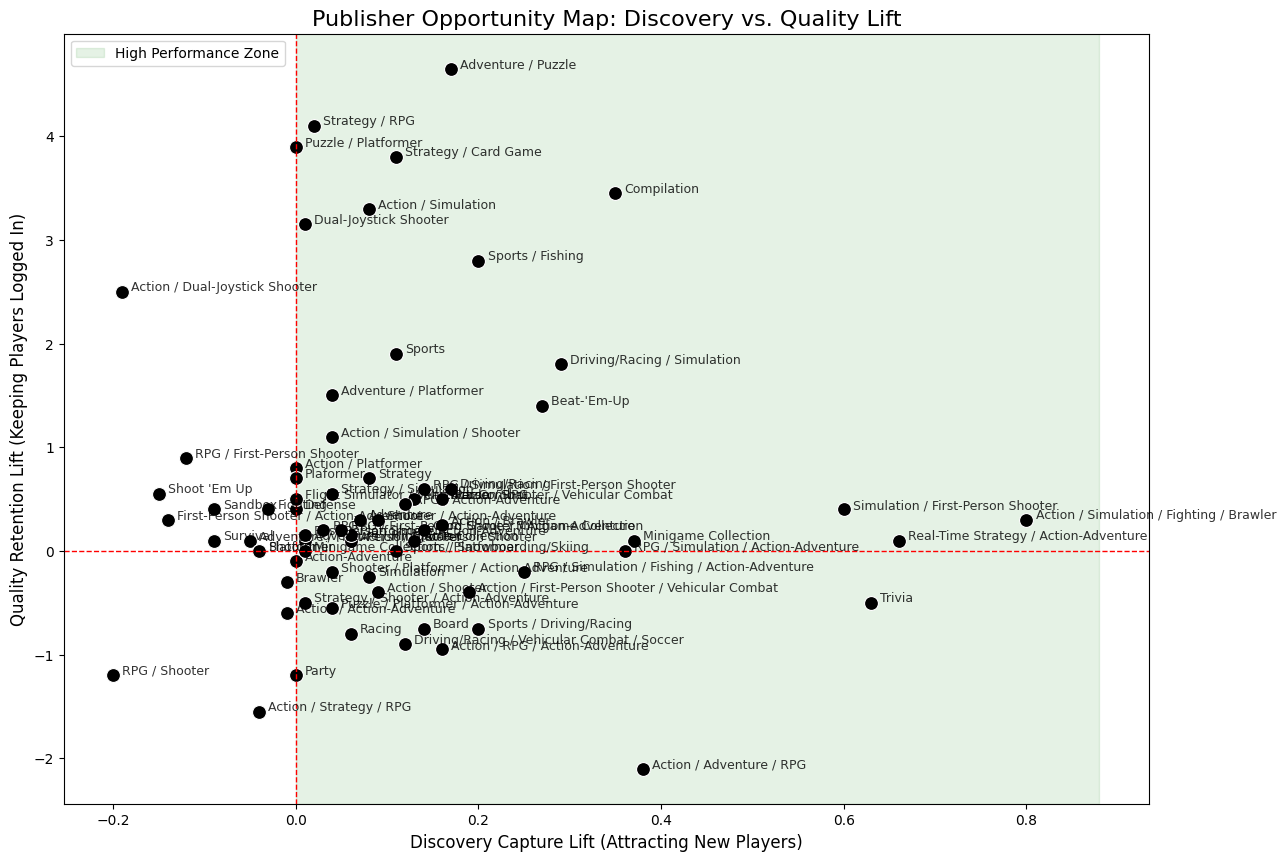

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for unique genres (since lift is calculated per genre pair)
plot_df = merged[merged['has_gamepass_remediation'] == True].copy()

plt.figure(figsize=(14, 10))

# 1. Create the Shaded High-Performance Quadrant
# This highlights the area where BOTH Discovery and Quality lift are positive
plt.axvspan(0, plot_df['discovery_lift'].max() * 1.1, 0, plot_df['quality_lift'].max() * 1.1, 
            color='green', alpha=0.1, label='High Performance Zone')

# 2. Draw the Scatter Plot
sns.scatterplot(data=plot_df, x='discovery_lift', y='quality_lift', s=100, color='black')

# 3. Add Labels Directly to the Dots
# We iterate through the dataframe to place text next to each point
for i in range(plot_df.shape[0]):
    plt.text(x=plot_df.discovery_lift.iloc[i] + 0.01, 
             y=plot_df.quality_lift.iloc[i] + 0.01, 
             s=plot_df.Genre.iloc[i], 
             fontsize=9, alpha=0.8)

# 4. Add Baseline Crossing Lines
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Formatting for clarity
plt.title('Publisher Opportunity Map: Discovery vs. Quality Lift', fontsize=16)
plt.xlabel('Discovery Capture Lift (Attracting New Players)', fontsize=12)
plt.ylabel('Quality Retention Lift (Keeping Players Logged In)', fontsize=12)
plt.grid(False) # Clean look
plt.show()